In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Normalizer
from sklearn.base import clone
import warnings 
warnings.filterwarnings('ignore')

## Import And Data Exploration

In [2]:
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')
df

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14479,3999,45.445303,-75.165596,2,1,18,20,20,10,80,0,131397,1
14480,3999,45.445574,-75.165168,2,1,28,20,10,10,80,0,131397,1
14481,4000,45.436682,-75.152416,0,12,21,30,30,4,63,0,122015,1
14482,4000,45.436978,-75.153278,0,12,31,30,20,4,63,0,122015,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14484 entries, 0 to 14483
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14484 non-null  int64  
 1   Latitude       14484 non-null  float64
 2   Longitude      14484 non-null  float64
 3   Day            14484 non-null  int64  
 4   Hour           14484 non-null  int64  
 5   Minute         14484 non-null  int64  
 6   Duration       14484 non-null  int64  
 7   RemainingTime  14484 non-null  int64  
 8   Resources      14484 non-null  int64  
 9   Coverage       14484 non-null  int64  
 10  OnPeakHours    14484 non-null  int64  
 11  GridNumber     14484 non-null  int64  
 12  Ligitimacy     14484 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.4 MB


In [4]:
df = abs(df)

In [5]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

## Data Spliting 20% - 80%

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling the data using algorithms (AdaBoost, Random Forest, Naive Bayes)

Using AdaBoostClassifier Algorithm
Accuracy: 97.44563341387642%
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       318
           1       0.99      0.98      0.99      2579

    accuracy                           0.97      2897
   macro avg       0.92      0.96      0.94      2897
weighted avg       0.98      0.97      0.98      2897



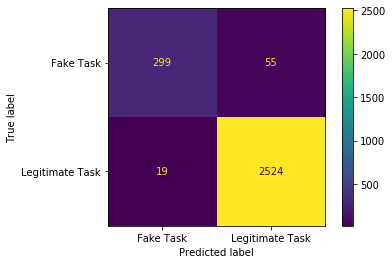

Using RandomForestClassifier Algorithm
Accuracy: 99.82740766309975%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       349
           1       1.00      1.00      1.00      2548

    accuracy                           1.00      2897
   macro avg       0.99      1.00      1.00      2897
weighted avg       1.00      1.00      1.00      2897



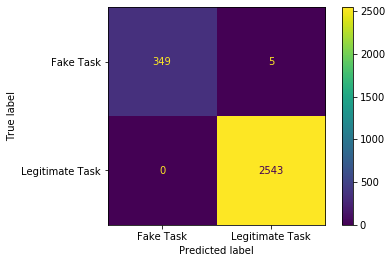

Using MultinomialNB Algorithm
Accuracy: 50.673110113910944%
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.12      0.20      1429
           1       0.51      0.88      0.64      1468

    accuracy                           0.51      2897
   macro avg       0.50      0.50      0.42      2897
weighted avg       0.50      0.51      0.42      2897



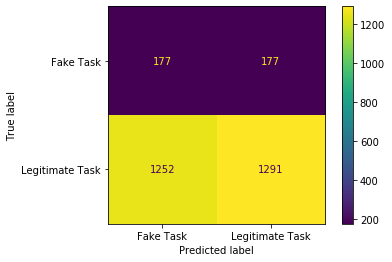

In [7]:
models = [
    AdaBoostClassifier(n_estimators=100, random_state=0), 
    RandomForestClassifier(max_depth=20, random_state=0), 
    MultinomialNB()
]

estimators = []
estsNames = []
estsAccs = []
labels = ['Fake Task', 'Legitimate Task']

for model in models:
    name = type(model).__name__
    estsNames.append(name)
    estimators.append((name, clone(model)))
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accVal = accuracy_score(y_predict, y_test) * 100
    estsAccs.append(accVal)
    print('Using {} Algorithm'.format(name))
    print('============================')
    print('Accuracy: {}%'.format(accVal))
    print('Classification Report: \n', classification_report(y_predict, y_test))
    plot_confusion_matrix(model, X_test, y_test, display_labels=labels, values_format='d')
    plt.show()
# End For

## Majority voting aggregation

Using VotingClassifier Algorithm
Accuracy: 98.82637210907835%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       346
           1       0.99      0.99      0.99      2551

    accuracy                           0.99      2897
   macro avg       0.97      0.98      0.97      2897
weighted avg       0.99      0.99      0.99      2897



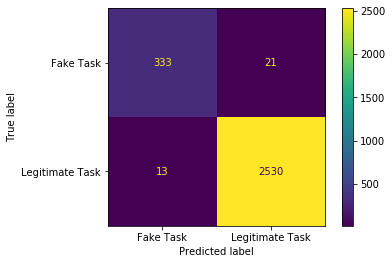

In [8]:
model = VotingClassifier(estimators = estimators)
name = type(model).__name__
estsNames.append(name)
estimators.append((name, clone(model)))
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accVal = accuracy_score(y_predict, y_test) * 100
estsAccs.append(accVal)
print('Using {} Algorithm'.format(name))
print('============================')
print('Accuracy: {}%'.format(accVal))
print('Classification Report: \n', classification_report(y_predict, y_test))
plot_confusion_matrix(model, X_test, y_test, display_labels=labels, values_format='d')
plt.show()

## Models Accuracy Plotting

-> The champion model is 'RandomForestClassifier'


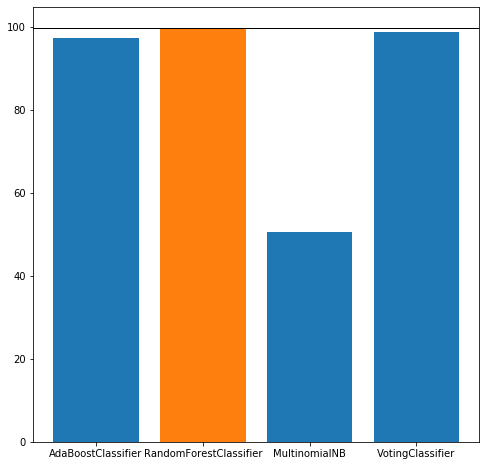

In [9]:
champModelId = np.argmax(estsAccs)
print("-> The champion model is '{}'".format(estsNames[champModelId]))
plt.figure(figsize=(8,8))
plt.axhline(y=estsAccs[champModelId], linewidth=1, color='k')
plt.bar(estsNames, estsAccs, color=['#1f77b4', '#ff7f0e', '#1f77b4', '#1f77b4'])
plt.show()